# Model Iterations:  Model 3

In this notebook, I continue to iterate upon models by employing convolutional neural networks. 

In [1]:
import os, shutil
import numpy as np
import random
np.random.seed(123)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

parent_dir = '../../'

Using TensorFlow backend.


In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import modelling as m

In [3]:
# plot params:
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['savefig.directory'] = parent_dir + '/figures/'

In [4]:
val_folder = parent_dir + 'data/seg_val/'
test_folder = parent_dir + 'data/seg_test/'
train_folder = parent_dir + 'data/seg_train/'

## Prepare for Modelling

First, we'll reshape the images in all the different datasets and create data generators for them.  I choose batch sizes that are 10% of the size of the datasets - as I did for model 2.

In [5]:
# test generator:
test_gen = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(test_folder, batch_size = 300)

# train generator:
train_gen = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(train_folder, batch_size = 1123)

# val generator:
val_gen = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(val_folder, batch_size = 280)

Found 3000 images belonging to 6 classes.
Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [6]:
# create the data sets
train_images, train_labels = next(train_gen)
test_images, test_labels = next(test_gen)
val_images, val_labels = next(val_gen)

Next, let's reshape in the same way that we did for model 2:

In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

train_y = np.reshape(train_labels[:,0], (1123, 1))
test_y = np.reshape(test_labels[:,0], (300, 1))
val_y = np.reshape(val_labels[:,0], (280, 1))

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(1123, 196608)
(300, 196608)
(280, 196608)
(1123, 1)
(300, 1)
(280, 1)


## Model 3:  CNN Model


In [8]:
model3 = Sequential()
# input layer
model3.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', 
                  input_shape = (256, 256, 3), data_format = "channels_last"))
model3.add(MaxPooling2D((2, 2)))
# hidden layer1
model3.add(Conv2D(128, (4, 4), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
# hidden layer 2
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
# flatten layer
model3.add(Flatten())
# final dense layer
model3.add(Dense(32, activation = 'relu'))
# output layer
model3.add(Dense(6, activation = 'softmax'))

In [9]:
# compile
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [64]:
# view the summary:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 124, 124, 128)     131200    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 57600)             0         
__________

In [65]:
callback = EarlyStopping(patience = 3)
results3 = model3.fit(train_images, train_labels, epochs = 25, batch_size = 32, 
                      validation_data = (val_img, val_y), callbacks = [callback])

ValueError: Error when checking target: expected dense_22 to have shape (1,) but got array with shape (6,)

In [33]:
train_img

array([[0.        , 0.4039216 , 0.6901961 , ..., 0.18039216, 0.40000004,
        0.4901961 ],
       [0.43529415, 0.49411768, 0.7254902 , ..., 0.4431373 , 0.4666667 ,
        0.5686275 ],
       [0.5058824 , 0.52156866, 0.53333336, ..., 0.7490196 , 0.9176471 ,
        1.        ],
       ...,
       [0.06666667, 0.1764706 , 0.36078432, ..., 0.21176472, 0.20784315,
        0.23137257],
       [0.7490196 , 0.7960785 , 0.89019614, ..., 0.36862746, 0.43921572,
        0.59607846],
       [0.23137257, 0.454902  , 0.7725491 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [34]:
type(train_img)

numpy.ndarray

In [37]:
type(train_images)

numpy.ndarray

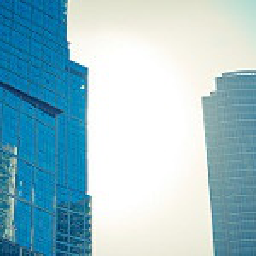

In [42]:
array_to_img(train_images[0])

In [43]:
array_to_img(train_images[0]).__dict__

{'im': <ImagingCore at 0x1a7ad5dd70>,
 'mode': 'RGB',
 '_size': (256, 256),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 'fp': None}

In [44]:
len(train_images)

1123